# Imports and Configurations

In [22]:
# -------------------------------------------
# IMPORTS
# -------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from lib.utils_general import diff_same_length
from lib.utils_calc_psi import numerov, init_val_in, plot_psi
import h5py as h5py
from os.path import expanduser
from lib.utils_scatter import get_coefficients
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import matplotlib as mpl
from os.path import expanduser
import re

In [55]:
home = expanduser("~")
path_here = home + '/MEGAsync/Projektarbeit/Code/'
#path_here = home + '/MEGA/MEGAsync/Projektarbeit/Code/'
path_plots = 'plots/'

In [56]:
# ----------------------------m-----------------
# PLOT CONFIGURATIONS
# ---------------------------------------------

# Change to the directory which contains the current script
# dirFile = os.path.dirname(os.path.join(path_here,
#                                        'evaluate_model.py'))
# Load style file
plt.style.use('file://' + path_here + 'PaperDoubleFig.mplstyle')
# Make some style choices for plotting
colourWheel = ['#329932',
               '#ff6961',
               'b',
               '#6a3d9a',
               '#fb9a99',
               '#e31a1c',
               '#fdbf6f',
               '#ff7f00',
               '#cab2d6',
               '#6a3d9a',
               '#ffff99',
               '#b15928',
               '#67001f',
               '#b2182b',
               '#d6604d',
               '#f4a582',
               '#fddbc7',
               '#f7f7f7',
               '#d1e5f0',
               '#92c5de',
               '#4393c3',
               '#2166ac',
               '#053061']
dashesStyles = [[3, 1],
                [1000, 1],
                [2, 1, 10, 1],
                [4, 1, 1, 1, 1, 1]]

# Create Strongly Scattering Potential

In [57]:
# -------------------------------------------
# INITIALIZATIONS
# -------------------------------------------

seed = 42
lambda0 = 0.15
k = 2*np.pi/lambda0
n_max = 2
ppw = 120
L = 80.5
lambda_min = lambda0/n_max
N = int(np.floor(2*L/lambda_min*ppw))
d = 2*L/(N-1)
grid = np.linspace(-L,L,int(N))

In [58]:
# -------------------------------------------
# ALGORITHM FOR ONE
# -------------------------------------------

vacuum = 0.5
A = 0.2
L_tmp = L-vacuum
numpy.random.seed(seed)
W = np.zeros(len(grid))

for i in range(1, int(30*L)):
    mu = np.random.rand() * ( 2 * L_tmp - 0.2 ) - ( L_tmp - 0.1 )
    sigma = np.random.rand() * 0.05 + 0.005
#     print('- ( grid - mu ) / (2*sigma**2): ', - ( grid - mu )**2 / (2*sigma**2))
    W = W + A*np.exp(- ( grid - mu )**2 / (2*sigma**2))
    
#     if i%10 == 0:
#         break
    
W = W + 1
W_diff = diff_same_length(W, d)
eps = W**2 - 1j*(W_diff/k)
n = np.sqrt(eps)

# Plot

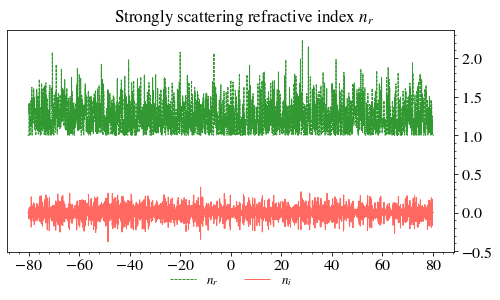

In [59]:
# -------------------------------------------
# PLOTS
# -------------------------------------------

plt.close('all')
fig, ax = plt.subplots()
alphaVal = 1#0.6
linethick = 1

plt.plot(grid, 
         n.real, 
         color=colourWheel[0 % len(colourWheel)],
         linestyle='-',
         dashes=dashesStyles[0 % len(dashesStyles)],
         lw=linethick, 
         label='$n_r$',
         alpha=alphaVal)
plt.plot(grid, 
         n.imag, 
         color=colourWheel[1 % len(colourWheel)],
         linestyle='-',
         dashes=dashesStyles[1 % len(dashesStyles)],
         lw=linethick, 
         label='$n_i$',
         alpha=alphaVal)

ax.set_xlabel('')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_label_coords(0.53, 1.01)
ax.yaxis.tick_right()
nameOfPlot = 'Strongly scattering refractive index $n_r$'
plt.ylabel(nameOfPlot, rotation=0)

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
legend = ax.legend(frameon=False,
                   loc='upper center',
                   bbox_to_anchor=(0.5, -0.05),
                   ncol=4)

fig.savefig(path_plots + 'ScatterPot.pdf', bbox_inches="tight", dpi=300)
plt.show()

# Calculate Indices for one

In [60]:
# with ni
t_l, r_l, t_r, r_r = get_coefficients(N, 
                                      k, 
                                      n = n, 
                                      d = d)

# this is the transmission coefficient from left
print('t_l: ', t_l)
# this is the reflection coefficient from left
print('r_l: ', r_l)
# this is the transmission coefficient
print('t_r: ', t_r)
# this is the reflection coefficient
print('r_r: ', r_r)

t_l:  0.5524456861486085
r_l:  0.0011351870079872087
t_r:  0.5524456861444204
r_r:  4.043485136076072


In [61]:
# hermitean case
t_l, r_l, t_r, r_r = get_coefficients(N, 
                                      k, 
                                      n = n.real, 
                                      d = d)

# this is the transmission coefficient from left
print('t_l: ', t_l)
# this is the reflection coefficient from left
print('r_l: ', r_l)
# this is the transmission coefficient
print('t_r: ', t_r)
# this is the reflection coefficient
print('r_r: ', r_r)

t_l:  0.004127040264111869
r_l:  0.9958729597366753
t_r:  0.004127040264123719
r_r:  0.9958729597351014


# Numerov Method

(array([1.        , 1.        , 1.        , ..., 1.75259638, 1.75819918,
        1.76395275]),
 0.9178407192230225,
 array([-0.5       , -0.52249865, -0.54463921, ...,  1.18147968,
         1.19907432,  1.21584717]),
 array([ 0.8660254 ,  0.85264011,  0.83867046, ..., -0.59724546,
        -0.5660565 , -0.53447958]))

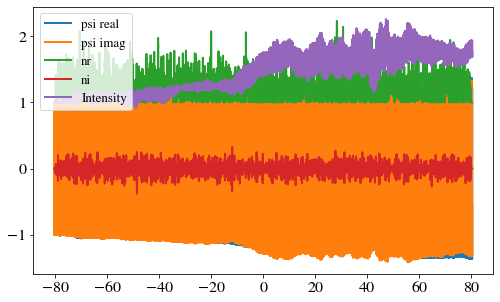

In [62]:
# -------------------------------------------
# NUMEROV METHOD
# -------------------------------------------

# with ni
plot_psi(x=grid, 
         dx=d, 
         n=n, 
         Amp=1, 
         k=k, 
         plot=True)

(array([  1.        ,   1.        ,   1.        , ..., 298.7776133 ,
        275.70212089, 253.19161419]),
 1.7142515182495117,
 array([-0.5       , -0.52249865, -0.54463921, ..., 12.12322454,
        11.64458233, 11.15795943]),
 array([ 0.8660254 ,  0.85264011,  0.83867046, ..., 12.3209188 ,
        11.83663057, 11.34423005]))

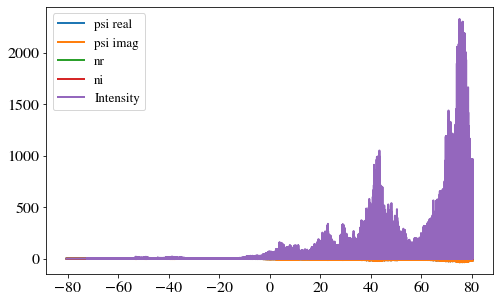

In [63]:
# hermitean
plot_psi(x=grid, 
         dx=d, 
         n=n.real, 
         Amp=1, 
         k=k, 
         plot=True)

# Generate Dataset of Strongly Scattering Potentials

In [ ]:
# ------------------------------------------------------
# Generate dataset of potentials
# ------------------------------------------------------
home = expanduser("~")
path_data = home + '/ml_data/'
f = h5py.File(path_data + 'scatter_potential.hdf5', 'w')

nr_data = f.create_dataset('n_r', shape=(600, 257600), dtype='float32')
ni_data = f.create_dataset('n_i', shape=(600, 257600), dtype='float32')
k_data = f.create_dataset('k', shape=(600, 1), dtype='float32')
psir_data = f.create_dataset('psi_r', shape=(600, 257600), dtype='float32')
psii_data = f.create_dataset('psi_i', shape=(600, 257600), dtype='float32')

for pot in range(600):
    k = 2*np.pi/lambda0 * (1 + 2*np.random.uniform())
    print(pot, k)
    W = np.zeros(len(grid))
    psir = np.zeros(len(grid))
    psii = np.zeros(len(grid))

    for i in range(1, int(30*L)):
        mu = np.random.rand() * ( 2 * L_tmp - 0.2 ) - ( L_tmp - 0.1 )
        sigma = np.random.rand() * 0.05 + 0.005
        W = W + A*np.exp(- ( grid - mu )**2 / (2*sigma**2))

    W = W + 1
    W_diff = diff_same_length(W, d)
    eps = W**2 - 1j*(W_diff/k)
    n = np.sqrt(eps)
    
    for idx in range(len(grid)):
        psir[idx] = np.cos(k*d*np.sum(W[:idx]))
        psii[idx] = np.sin(k*d*np.sum(W[:idx]))
        
    k_data[pot] = k
    nr_data[pot] = n.real
    ni_data[pot] = n.imag
    psir_data[pot] = psir
    psii_data[pot] = psii
    
f.flush()
f.close()

In [ ]:
# ------------------------------------------------------
# Calculate mean, std of whole dataset
# ------------------------------------------------------
home = expanduser("~")
path_data = home + '/ml_data/'
f = h5py.File(path_data + 'scatter_potential.hdf5', 'r')

nr_data = f.get('n_r')
nr_mean = np.mean(nr_data)
print('nr mean: ', nr_mean)
nr_std = np.std(nr_data)
print('nr std: ', nr_std)

ni_data = f.get('n_i')
ni_mean = np.mean(ni_data)
print('ni mean: ', ni_mean)
ni_std = np.std(ni_data)
print('ni std: ', ni_std)

# Calculate Mean of Reflections in Dataset in Hermitean, Predicted and Label Case

In [51]:
refl_hermit = []

f_h=open("plots/scattercoefficients_hermitean.txt", "r")
lines = f_h.readlines() # ommit first line
f_h.close()

#indices = slice(1,120,2)
#lines = lines[indices]

lines = lines[1:]

for line in lines:
    refl_hermit.append(float(re.split(r'\t+', line)[2]))
    
print(np.mean(refl_hermit))

0.7178426529148381


In [52]:
refl_prediction = []

f_p=open("plots/scattercoefficients_prediction.txt", "r")

lines = f_p.readlines() # ommit first line
f_p.close()

lines = lines[1:]

for line in lines:
    refl_prediction.append(float(re.split(r'\t+', line)[2]))
    
print(np.mean(refl_prediction))

0.018995348517448475


In [53]:
refl_label = []

f_l=open("plots/scattercoefficients_label.txt", "r")

lines = f_l.readlines() # ommit first line
f_l.close()

lines = lines[1:]

for line in lines:
    refl_label.append(float(re.split(r'\t+', line)[2]))
    
print(np.mean(refl_label))

0.006346009974689495
